In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [86]:
data1 = pd.read_excel('E:\\tianchi\\jietonglv.xlsx')
data2 = pd.read_excel('E:\\tianchi\\jietonglv.xlsx',sheet_name = 1)
data1 = data1.iloc[:,:-1]
data2 = data2.iloc[:,:-1]
data = pd.concat([data1,data2],ignore_index = True)

In [87]:
data['人均接电量'] = data['来电量']/data['在线人数']
data['星期'] = 0
for i in range(data.shape[0]):
    data.iloc[i,6] = data.iloc[i,0].weekday() + 1

## 1.人均接电量与服务水平的关系

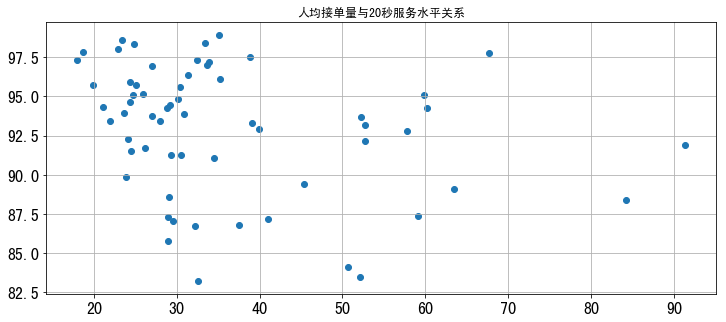

In [88]:
plt.figure(figsize = (12,5))
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(data['人均接电量'],data['20s服务水平']*100)
plt.grid()
plt.tick_params(labelsize=16)
plt.title('人均接单量与20秒服务水平关系')
plt.show()

#### 结论：当人均接电话量小于35时，很容易达到95%以上，当超过35时，很难达到95%以上。

In [90]:
data[(data['人均接电量'] > 35)].describe()

,来电量,在线人数,接通率,20s服务水平,人均接电量,星期
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1553.904762,28.619048,0.988868,0.916925,53.140957,4.285714
std,638.557664,5.499784,0.005489,0.043854,15.135180,1.874643
min,788.000000,19.000000,0.977366,0.834705,35.148148,1.000000
25%,1077.000000,24.000000,0.984076,0.884006,39.888889,3.000000
50%,1305.000000,28.000000,0.991414,0.928171,52.200000,4.000000
75%,1963.000000,33.000000,0.992885,0.942693,59.810811,6.000000
max,3016.000000,37.000000,0.996839,0.989463,91.393939,7.000000


#### 结论：分析人均大于35单的情况，共有21天，平均来电量都在1550左右，在线人数平均也有28.6人，但是服务水平还是上不去，均值只有91.6%，这也反映出当来电量达到一定程度时，在线人数即使增加以下，服务水平还是上不去。

## 2.来电量与服务水平的关系

Text(0.5,1,'来电量与20秒服务水平关系')

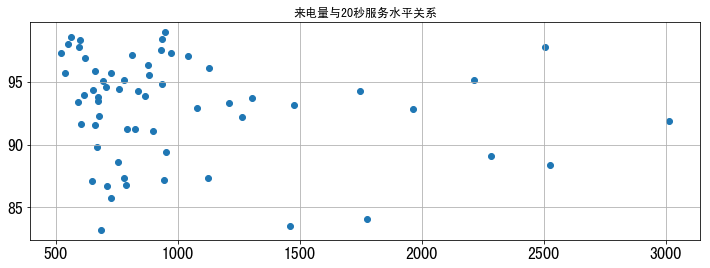

In [68]:
plt.figure(figsize = (12,4))
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(data['来电量'],data['20s服务水平']*100)
plt.grid()
plt.tick_params(labelsize=16)
plt.title('来电量与20秒服务水平关系')

####  结论：当天的来电量小于1000时，比较容易达到95%的服务水平，当来电量大于1000时，很难达到此目标。

In [77]:
df2 = data[(data['来电量']>1000)]

In [78]:
df2.describe()

,来电量,在线人数,接通率,20s服务水平,人均接电量,星期
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1712.470588,30.352941,0.989429,0.919262,55.988830,4.352941
std,607.901423,4.923682,0.005627,0.041506,15.495803,2.059769
min,1043.000000,19.000000,0.977366,0.834705,33.645161,1.000000
25%,1211.000000,28.000000,0.988475,0.890981,50.685714,3.000000
50%,1475.000000,31.000000,0.991571,0.929434,52.708333,5.000000
75%,2213.000000,34.000000,0.992885,0.942693,60.172414,6.000000
max,3016.000000,37.000000,0.997124,0.977645,91.393939,7.000000


#### 结论：上述表说明：来电量大于1000的共有17天，在这17天里，20s服务水平平均只有91.9%，在线人数平均也有30.3人，不算少，但是由于来电量大，导致服务跟不上。

In [83]:
df3 = data[(data['来电量']<1000) & (data['20s服务水平'] > 0.95)]
df4 = data[(data['来电量']<1000) & (data['20s服务水平'] < 0.95)]

In [84]:
df3.describe()

,来电量,在线人数,接通率,20s服务水平,人均接电量,星期
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,733.166667,27.055556,0.994547,0.969906,27.225430,3.333333
std,160.787126,2.645134,0.003215,0.012407,5.971395,1.909727
min,520.000000,23.000000,0.987685,0.950938,17.931034,1.000000
25%,596.250000,24.000000,0.992219,0.957820,23.601852,1.250000
50%,710.500000,27.500000,0.995042,0.972376,25.535057,3.500000
75%,880.000000,29.000000,0.997149,0.979520,32.130357,5.000000
max,972.000000,32.000000,0.998716,0.989463,38.833333,6.000000


In [85]:
df4.describe()

,来电量,在线人数,接通率,20s服务水平,人均接电量,星期
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,746.500000,25.769231,0.987381,0.908477,29.345984,4.269231
std,107.433421,2.929951,0.006891,0.033334,5.611754,2.089166
min,591.000000,21.000000,0.964964,0.832117,21.064516,1.000000
25%,669.750000,23.250000,0.985101,0.876331,24.921498,2.250000
50%,716.000000,26.000000,0.987929,0.914033,28.999231,4.000000
75%,814.750000,27.750000,0.992382,0.938468,30.790013,6.000000
max,952.000000,31.000000,0.996616,0.948608,45.333333,7.000000


#### 结论：来电量小于1000的共有44天，其中服务水平大于95%的有18天，小于95%的有26天，两者之间的平均来电量大致相当，但在线人数的均值一个是27，一个是25.7，在线人数少导致服务水平下降。

## 3.在线人数与服务水平的关系

Text(0.5,1,'在线人数与20秒服务关系')

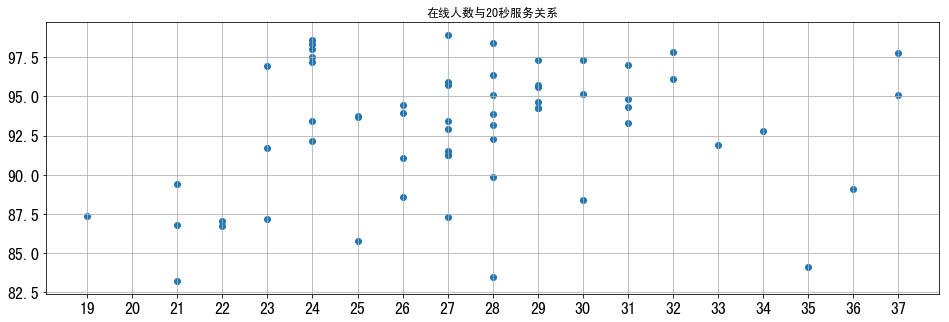

In [93]:
plt.figure(figsize = (16,5))
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(data['在线人数'],data['20s服务水平']*100)
plt.grid()
plt.xticks(np.linspace(data['在线人数'].min(),data['在线人数'].max(),data['在线人数'].max()-data['在线人数'].min()+1))
plt.tick_params(labelsize=16)
plt.title('在线人数与20秒服务关系')

####  结论：在线人数在24--32之间时，容易达到95%的水平，人或多或少都不容易达到95%的水平，特别是当在线人数少于23时，都在90以下。

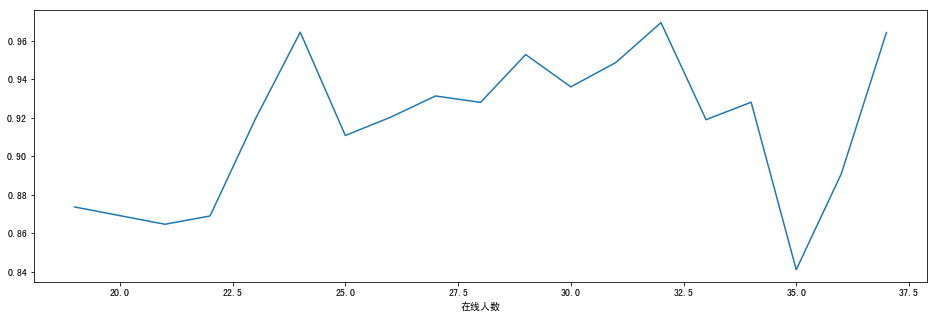

In [137]:
plt.figure(figsize = (16,5))
data.groupby('在线人数')['20s服务水平'].mean().plot()

## 4.星期与服务水平的关系

Text(0.5,1,'星期与20秒服务关系')

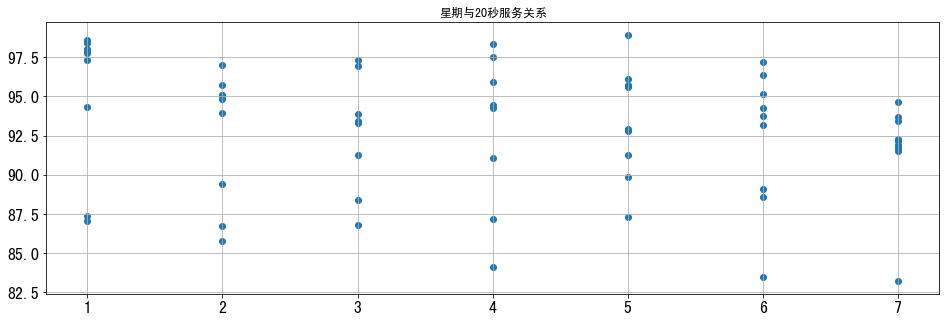

In [64]:
plt.figure(figsize = (16,5))
plt.rcParams['font.sans-serif']=['SimHei']
plt.scatter(data['星期'],data['20s服务水平']*100)
plt.grid()
plt.tick_params(labelsize=16)
plt.title('星期与20秒服务关系')

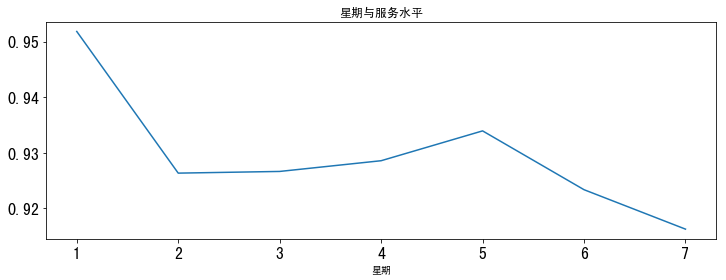

In [134]:
plt.figure(figsize = (12,4))
plt.tick_params(labelsize=16)
plt.title('星期与服务水平')
data.groupby('星期')['20s服务水平'].mean().plot()

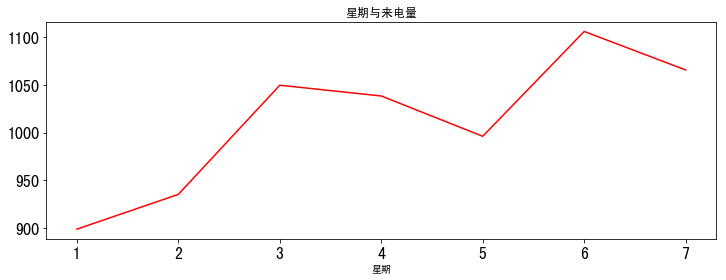

In [125]:
plt.figure(figsize = (12,4))
plt.tick_params(labelsize=16)
plt.title('星期与来电量')
data.groupby('星期')['来电量'].mean().plot(c = 'r')

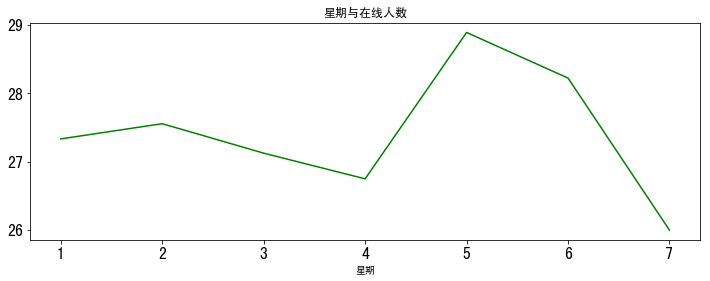

In [128]:
plt.figure(figsize = (12,4))
plt.tick_params(labelsize=16)
plt.title('星期与在线人数')
data.groupby('星期')['在线人数'].mean().plot(c = 'g')